# <h1> Predictive Analytics: Harga Rumah:</h1>

Deskripsi Latar Belakang Proyek Prediksi Harga Rumah dengan Machine Learning
Proyek ini bertujuan untuk mengembangkan model machine learning yang mampu memperkirakan harga rumah secara otomatis dan cepat, sehingga memudahkan proses pengambilan keputusan dalam transaksi properti. Dengan proyek ini, diharapkan dapat mengembangkan model prediktif yang tidak hanya akurat tetapi juga dapat digunakan secara langsung oleh pelaku industri properti untuk menganalisis potensi investasi.

[Link Kaggle](https://www.kaggle.com/datasets/fratzcan/usa-house-prices/data)


# Install Library

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Data Loading

In [57]:
house = pd.read_csv('USA Housing Dataset.csv')
house

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,3.760000e+05,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,8.000000e+05,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2.238888e+06,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,3.240000e+05,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,5.499000e+05,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4136,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4137,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4138,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


# Exploratory Data Analysis - Deskripsi Variabel

In [58]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [59]:
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000


Variabel-variabel pada House Price dataset adalah sebagai berikut:

- date	: Tanggal transaksi penjualan rumah. Dapat digunakan untuk analisis tren harga dari waktu ke waktu.
- price	:	Harga jual rumah dalam USD. Ini adalah target variable yang akan diprediksi oleh model. Kolom ini merupakan target fitur
- bedrooms	:	Jumlah kamar tidur. Semakin banyak kamar tidur, umumnya semakin tinggi nilai properti.
- bathrooms	:	Jumlah kamar mandi. Properti dengan lebih banyak kamar mandi cenderung memiliki nilai lebih tinggi.
- sqft_living	:	Luas area tempat tinggal (dalam kaki persegi). Faktor penting yang sangat memengaruhi harga.
- sqft_lot	:	Luas lahan properti (dalam kaki persegi). Lot yang lebih luas bisa menjadi nilai tambah.
- floors	:	Jumlah lantai pada properti. Properti bertingkat bisa jadi lebih mahal karena ruang yang lebih banyak.
- waterfront	:	Indikator biner (1 = properti memiliki pemandangan waterfront, 0 = tidak). Properti di tepi air biasanya bernilai lebih tinggi.
- view	:	Indeks (0–4) yang menunjukkan kualitas pemandangan dari properti. Nilai lebih tinggi berarti pemandangan lebih baik.
- condition	:	Indeks (1–5) yang merepresentasikan kondisi fisik rumah. Nilai lebih tinggi menunjukkan kondisi lebih baik.
- sqft_above	:	Luas bangunan di atas tanah (tidak termasuk basement). Digunakan untuk mengukur nilai dari ruang atas tanah.
- sqft_basement	:	Luas basement. Basement yang usable bisa menjadi ruang tambahan dan menambah nilai.
- yr_built	:	Tahun rumah dibangun. Rumah baru cenderung memiliki fasilitas modern.
- yr_renovated	:	Tahun terakhir renovasi. Properti yang direnovasi baru-baru ini bisa bernilai lebih tinggi.
- street	:	Nama jalan dari properti. Bisa digunakan untuk analisis spasial atau fitur tambahan berbasis lokasi.
- city	:	Kota tempat rumah berada. Kota yang berbeda memiliki dinamika harga yang berbeda pula.
- statezip	:	Kombinasi kode negara bagian dan kode pos. Memberikan konteks lokasi yang lebih spesifik.
- country	:	Negara tempat properti berada. Dalam dataset ini adalah "USA", namun bisa disesuaikan untuk Australia di proyek lanjutan.


#Exploratory Data Analysis

In [60]:
# Cek missing values
missing_values = house.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [61]:
house.duplicated().sum()

np.int64(0)

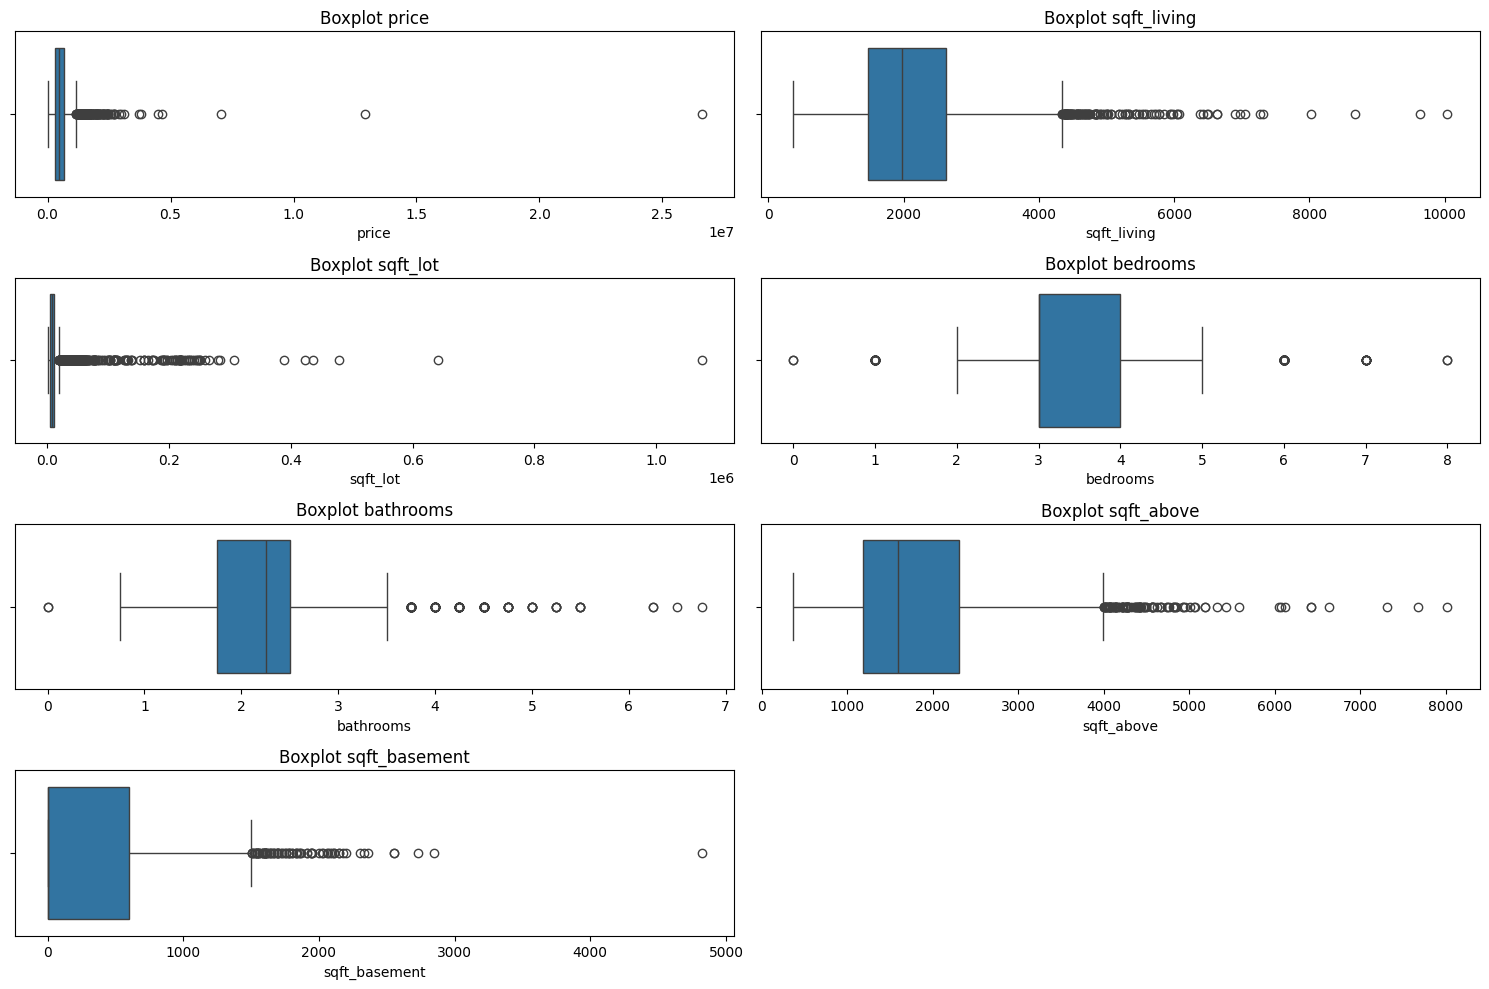

In [62]:
features_to_check = ['price', 'sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'sqft_above', 'sqft_basement']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_check, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=house, x=feature)
    plt.title(f'Boxplot {feature}')

plt.tight_layout()
plt.show()

In [63]:
df_clean = house.copy()

for col in features_to_check:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

price: 215 outliers
sqft_living: 69 outliers
sqft_lot: 433 outliers
bedrooms: 76 outliers
bathrooms: 7 outliers
sqft_above: 61 outliers
sqft_basement: 37 outliers


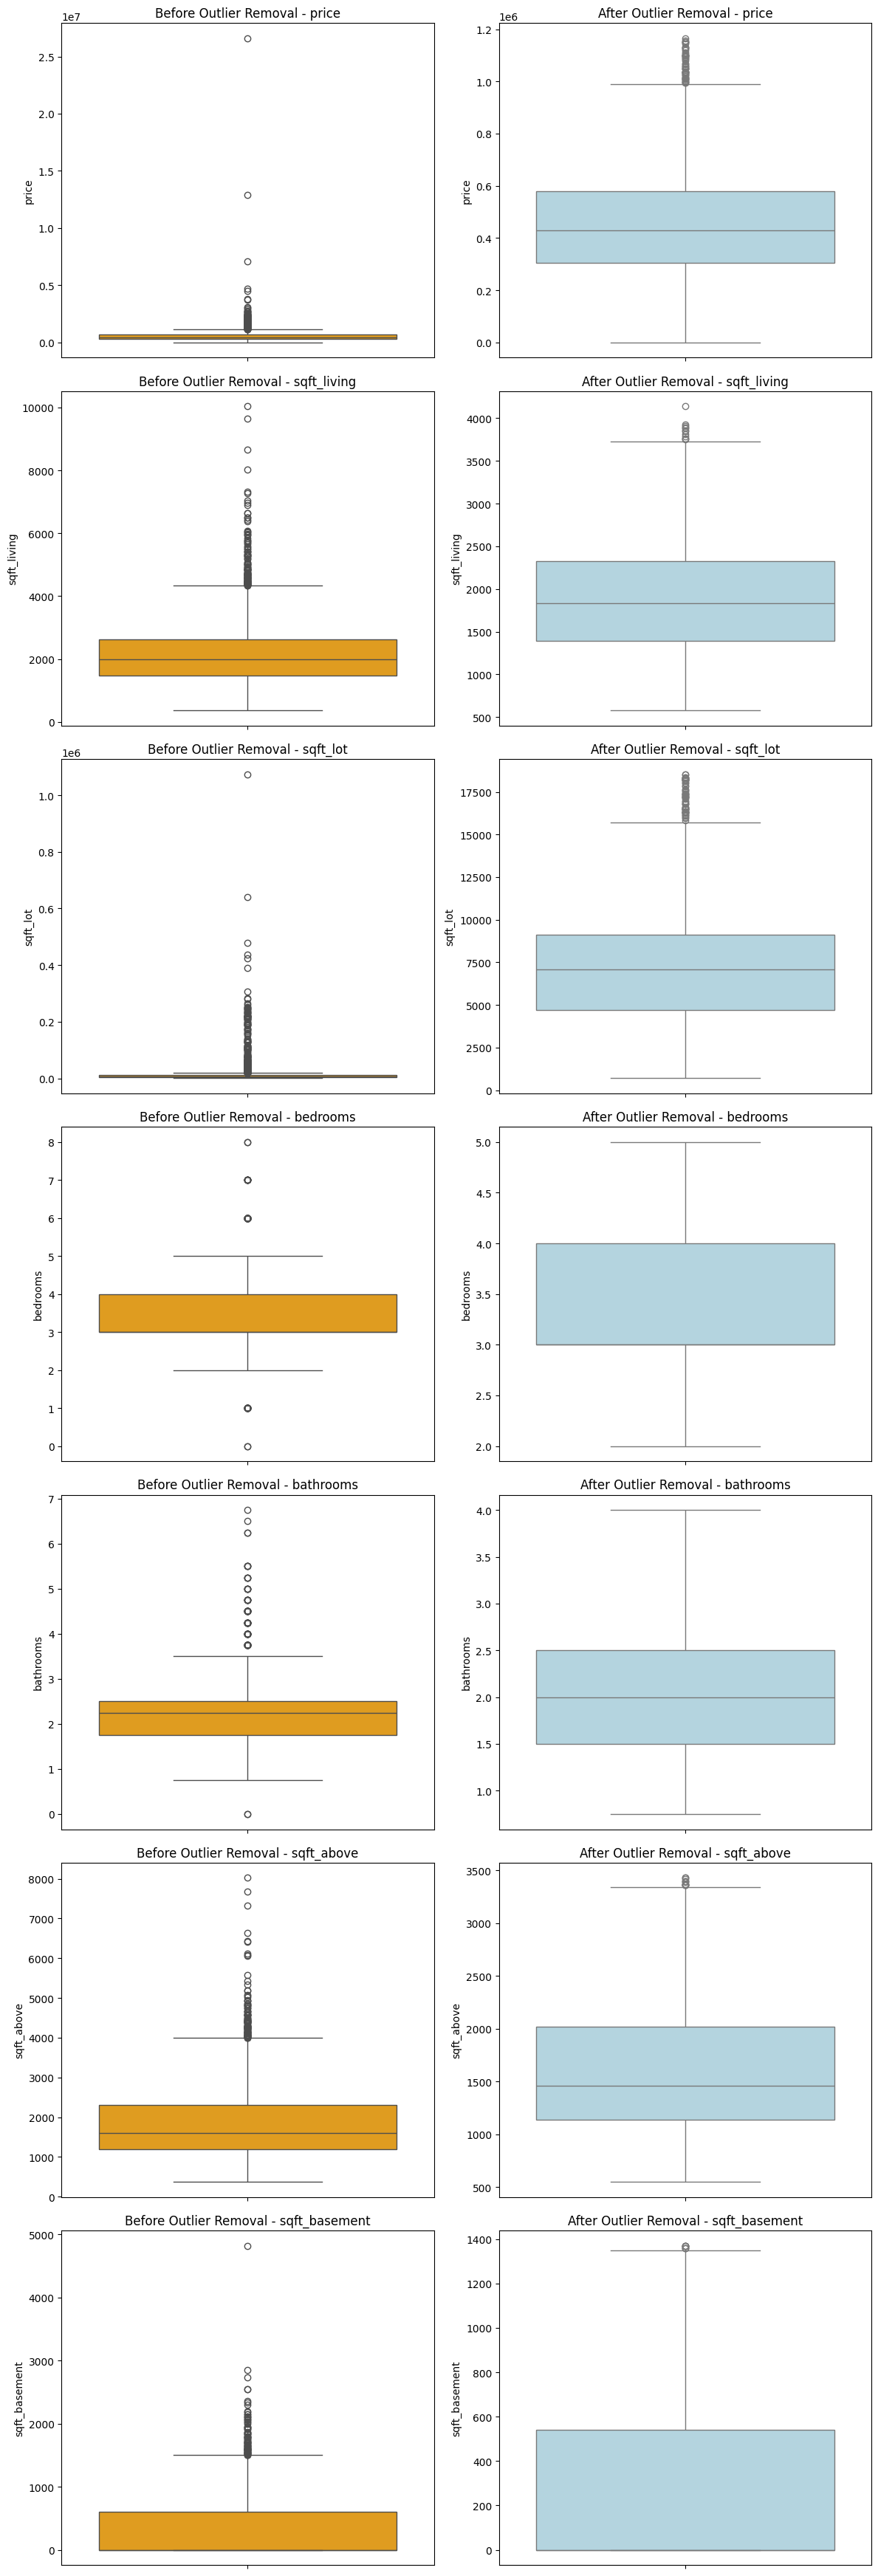

In [64]:
fig, axes = plt.subplots(nrows=len(features_to_check), ncols=2, figsize=(12, 5 * len(features_to_check)))

for i, feature in enumerate(features_to_check):
    # Sebelum pembersihan
    sns.boxplot(data=house, y=feature, ax=axes[i][0], color='orange')
    axes[i][0].set_title(f'Before Outlier Removal - {feature}')

    # Sesudah pembersihan
    sns.boxplot(data=df_clean, y=feature, ax=axes[i][1], color='lightblue')
    axes[i][1].set_title(f'After Outlier Removal - {feature}')

plt.tight_layout()
plt.show()

In [65]:
df_clean.drop(['street', 'country'], axis=1, inplace=True)

In [66]:
df_clean['date'] = pd.to_datetime(df_clean['date'])

In [67]:
df_clean['condition'] = df_clean['condition'].astype(int)
df_clean['waterfront'] = df_clean['waterfront'].astype(int)
df_clean['view'] = df_clean['view'].astype(int)

Mengubah data kategori seperti condition, waterfront, dan view menjadi integer menyesuaikan dengan tipe data dari nilai sebenarnya

In [68]:
df_clean['bedrooms'] = df_clean['bedrooms'].astype(int)
df_clean['bathrooms'] = df_clean['bathrooms'].astype(int)
df_clean['floors'] = df_clean['floors'].astype(int)

Menyesuaikan tipe data dari kolom bedrooms, bathrooms, dan floors menjadi integer

In [69]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3242 entries, 0 to 4139
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3242 non-null   datetime64[ns]
 1   price          3242 non-null   float64       
 2   bedrooms       3242 non-null   int64         
 3   bathrooms      3242 non-null   int64         
 4   sqft_living    3242 non-null   int64         
 5   sqft_lot       3242 non-null   int64         
 6   floors         3242 non-null   int64         
 7   waterfront     3242 non-null   int64         
 8   view           3242 non-null   int64         
 9   condition      3242 non-null   int64         
 10  sqft_above     3242 non-null   int64         
 11  sqft_basement  3242 non-null   int64         
 12  yr_built       3242 non-null   int64         
 13  yr_renovated   3242 non-null   int64         
 14  city           3242 non-null   object        
 15  statezip       3242 non-nu

In [70]:
# cek value tiap fitur
for col in df_clean.columns:
    print(f"\nValue counts for column '{col}':")
    print(df_clean[col].value_counts().head(15))


Value counts for column 'date':
date
2014-06-23    110
2014-06-25    107
2014-07-08    103
2014-06-26     97
2014-06-24     94
2014-05-20     91
2014-07-09     91
2014-06-03     88
2014-06-17     88
2014-05-28     85
2014-05-27     85
2014-07-01     84
2014-06-10     80
2014-06-20     80
2014-06-16     80
Name: count, dtype: int64

Value counts for column 'price':
price
300000.0    37
0.0         28
440000.0    25
400000.0    24
525000.0    23
435000.0    22
415000.0    22
250000.0    21
450000.0    21
350000.0    21
345000.0    20
330000.0    20
405000.0    19
600000.0    19
550000.0    19
Name: count, dtype: int64

Value counts for column 'bedrooms':
bedrooms
3    1595
4     994
2     460
5     193
Name: count, dtype: int64

Value counts for column 'bathrooms':
bathrooms
2    1673
1    1331
3     227
0       6
4       5
Name: count, dtype: int64

Value counts for column 'sqft_living':
sqft_living
1720    29
1660    27
1840    25
1700    25
1480    24
1200    24
1320    23
1490    23

Insight :
- pada kolom price, terdapat nilai 0 yang berarti harus di hilangkan agar saat pelatihan model bisa memprediksi dengan baik
- nilai 0 juga terdapat pada fitur waterfront dan view, fitur ini termasuk kategorial jadi nilai tersebut tidak di hilangkan.
- dan juga nilai 0 terdapat pada fitur yr_renovated yang bisa diasumsikan rumah tersebut belum pernah di renovasi.
- sqft_basement juga mempunyai nilai 0, artinya rumah tidak memiliki basement

In [71]:
print("Jumlah baris sebelum:", len(df_clean))
df_clean = df_clean[df_clean['price'] != 0]
df_clean = df_clean[df_clean['bathrooms'] != 0]
print("Jumlah baris sesudah:", len(df_clean))

Jumlah baris sebelum: 3242
Jumlah baris sesudah: 3208


In [72]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3208 entries, 0 to 4139
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3208 non-null   datetime64[ns]
 1   price          3208 non-null   float64       
 2   bedrooms       3208 non-null   int64         
 3   bathrooms      3208 non-null   int64         
 4   sqft_living    3208 non-null   int64         
 5   sqft_lot       3208 non-null   int64         
 6   floors         3208 non-null   int64         
 7   waterfront     3208 non-null   int64         
 8   view           3208 non-null   int64         
 9   condition      3208 non-null   int64         
 10  sqft_above     3208 non-null   int64         
 11  sqft_basement  3208 non-null   int64         
 12  yr_built       3208 non-null   int64         
 13  yr_renovated   3208 non-null   int64         
 14  city           3208 non-null   object        
 15  statezip       3208 non-nu

# Exploratory Data Analysis - Univariate Analysis

In [73]:
# Fitur Numerik
numerical_features = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
                      'sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
                      'yr_built', 'yr_renovated']

# Fitur Kategorikal
categorical_features = ['waterfront', 'view', 'condition', 'city']

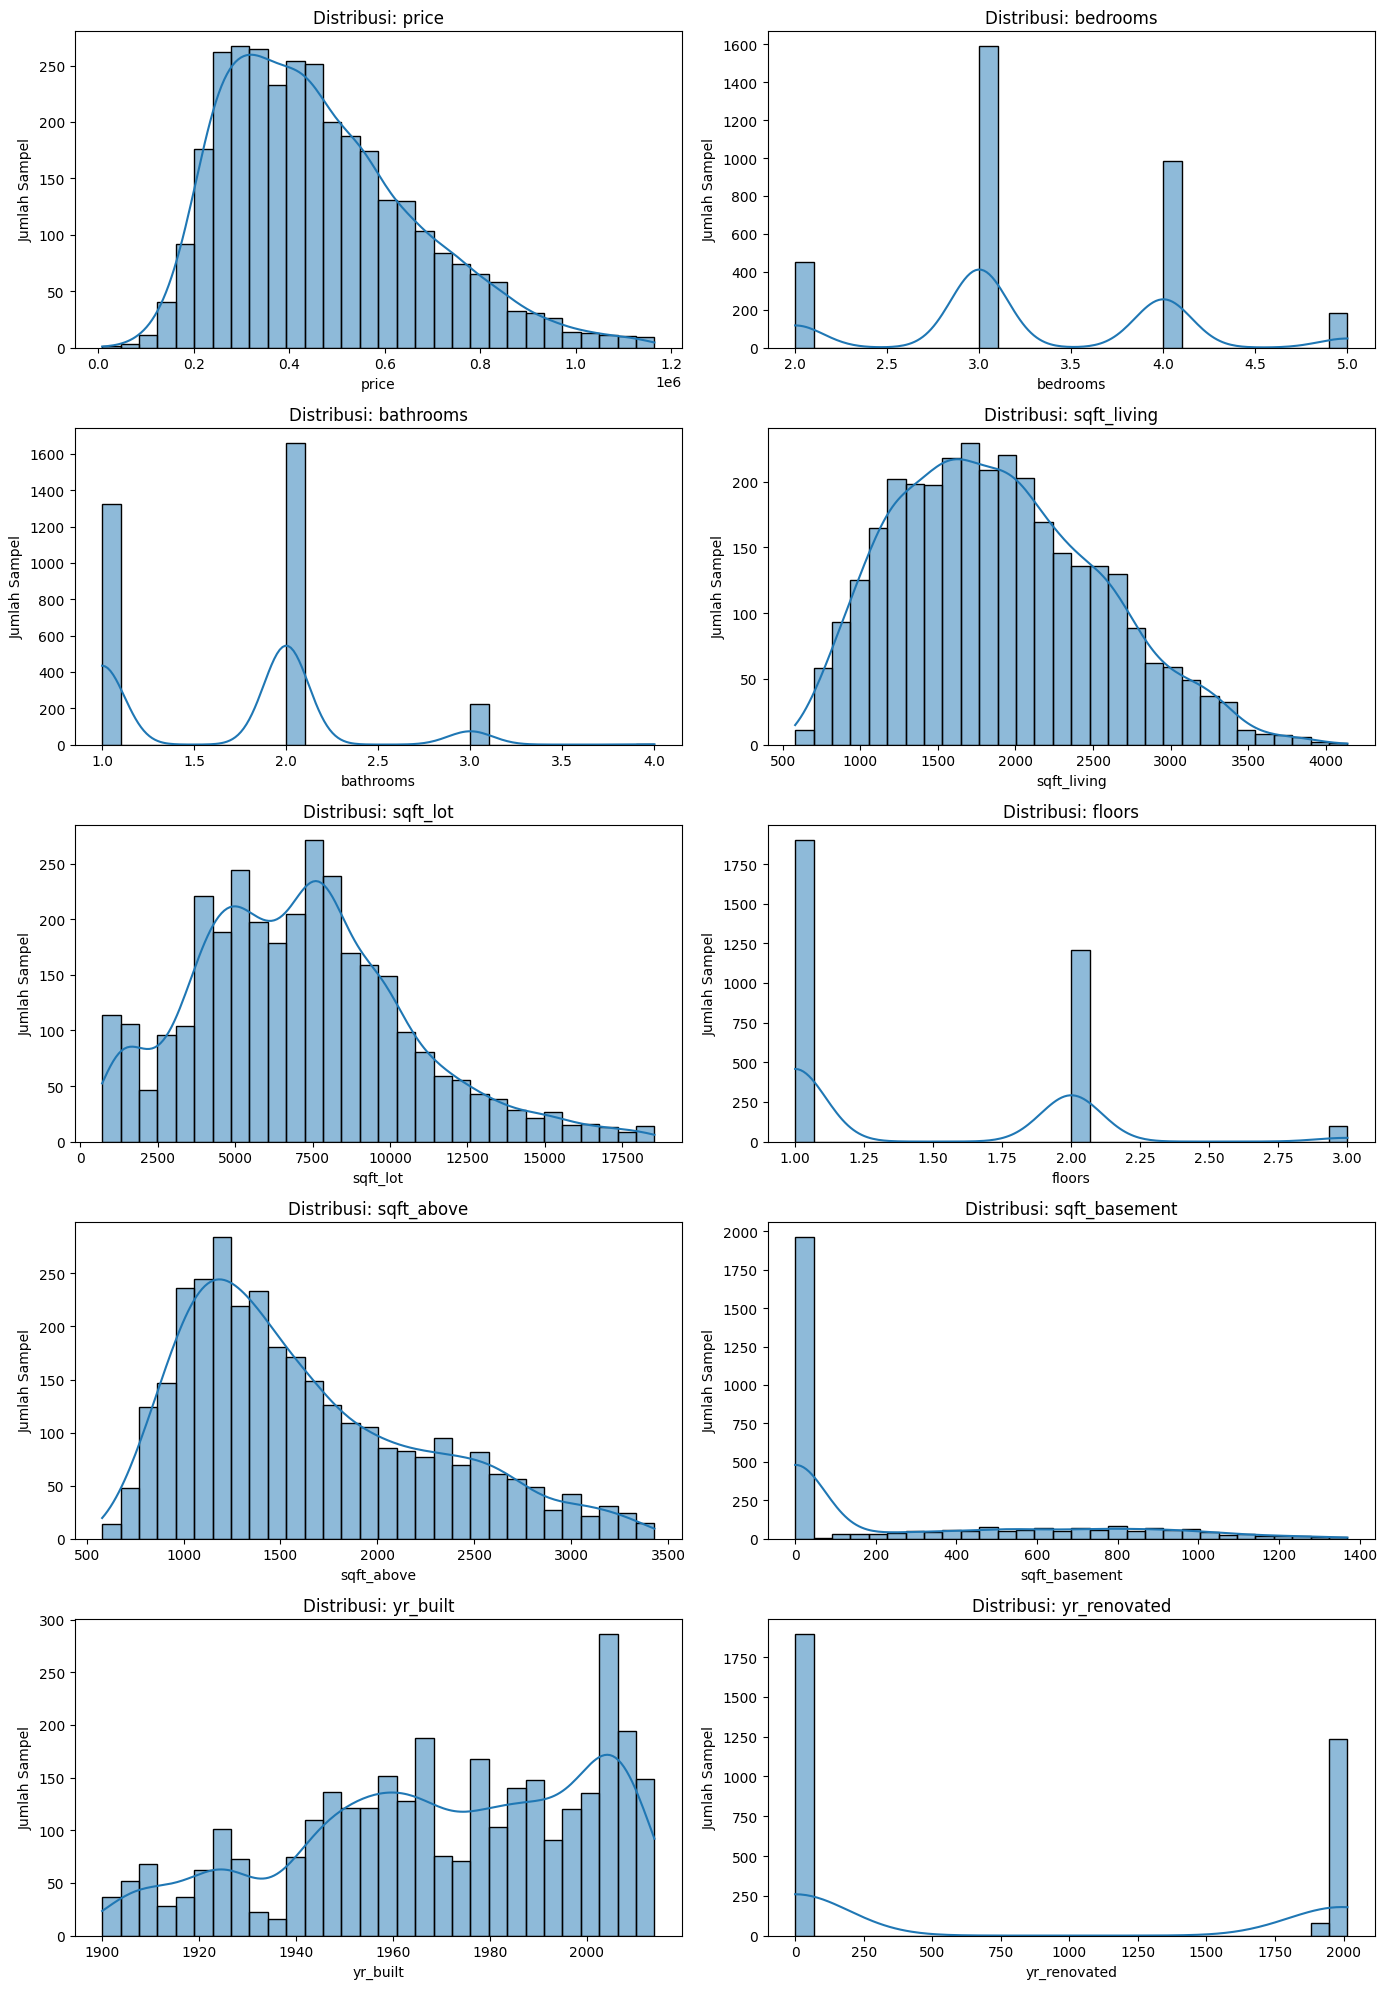

In [74]:
cols = 2
rows = (len(numerical_features) + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 4))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(df_clean[feature], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribusi: {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Jumlah Sampel')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Insight:
- Pada kolom sqft_basement lebih banyak data rumah yang tidak memiliki basement daripd yang memiliki bisa di lihat data lebih condong ke arah kiri menuju 0 dan diagram batang juga menunjukkan sebanyak sekitar 2000 rumah tidak memiliki basement.
- pada kolom yr_renovated persebaran data tidak merata. ada beberapa rumah yang di renovasi dan tidak. tahun renovasinya pun beragam.
- Distribusi jumlah lantai menunjukkan tiga puncak utama, yaitu pada 1 lantai, 2 lantai, dan 3 lantai. Ini mengindikasikan bahwa sebagian besar properti memiliki salah satu dari jumlah lantai tersebut.
- Distribusi jumlah kamar tidur menunjukkan nilai tertinggi berada pada sekitar 3 kamar tidur, diikuti oleh nilai yang lebih rendah pada sekitar 4 kamar tidur. Terdapat juga sejumlah properti dengan 2 dan 5 kamar tidur.
- Tahun dibangun (yr_built) menunjukkan distribusi yang memiliki beberapa puncak, terutama di sekitar awal abad ke-20, pertengahan abad ke-20, dan menjelang akhir abad ke-20. Ini mengindikasikan periode-periode pembangunan properti yang signifikan.
- Dilihat dari distribusi harga, sebagian besar properti memiliki harga yang terkonsentrasi antara 0.2 hingga 0.6. Distribusi ini cenderung miring ke kanan (positively skewed), yang mengindikasikan adanya beberapa properti dengan harga yang jauh lebih tinggi daripada mayoritas.
- Luas bangunan di atas tanah (sqft_above) memiliki distribusi yang mirip dengan sqft_living, cenderung miring ke kanan dengan sebagian besar nilai berada di antara 1000 hingga 2500 sqft.
- Luas tanah (sqft_lot) menunjukkan distribusi yang sangat miring ke kanan. Sebagian besar properti memiliki luas tanah yang relatif kecil, namun terdapat beberapa properti dengan luas tanah yang sangat besar, yang menyebabkan ekor distribusi memanjang ke kanan.
- Distribusi jumlah kamar mandi menunjukkan puncak utama pada sekitar 2 kamar mandi, dan puncak kedua yang lebih rendah pada sekitar 1 kamar mandi. Ini mengindikasikan bahwa sebagian besar properti memiliki antara 1 hingga 3 kamar mandi.
- Luas ruang tamu (sqft_living) memiliki distribusi yang cenderung miring ke kanan, dengan sebagian besar properti memiliki luas antara 1000 hingga 2500 sqft. Terdapat penurunan jumlah properti seiring dengan bertambahnya luas ruang tamu.

# Exploratory Data Analysis - Multivariate Analysis
Menampilkan rata-rata harga terhadap masing-masing fitur untuk mengetahui pengaruh fitur kategori terhadap harga.

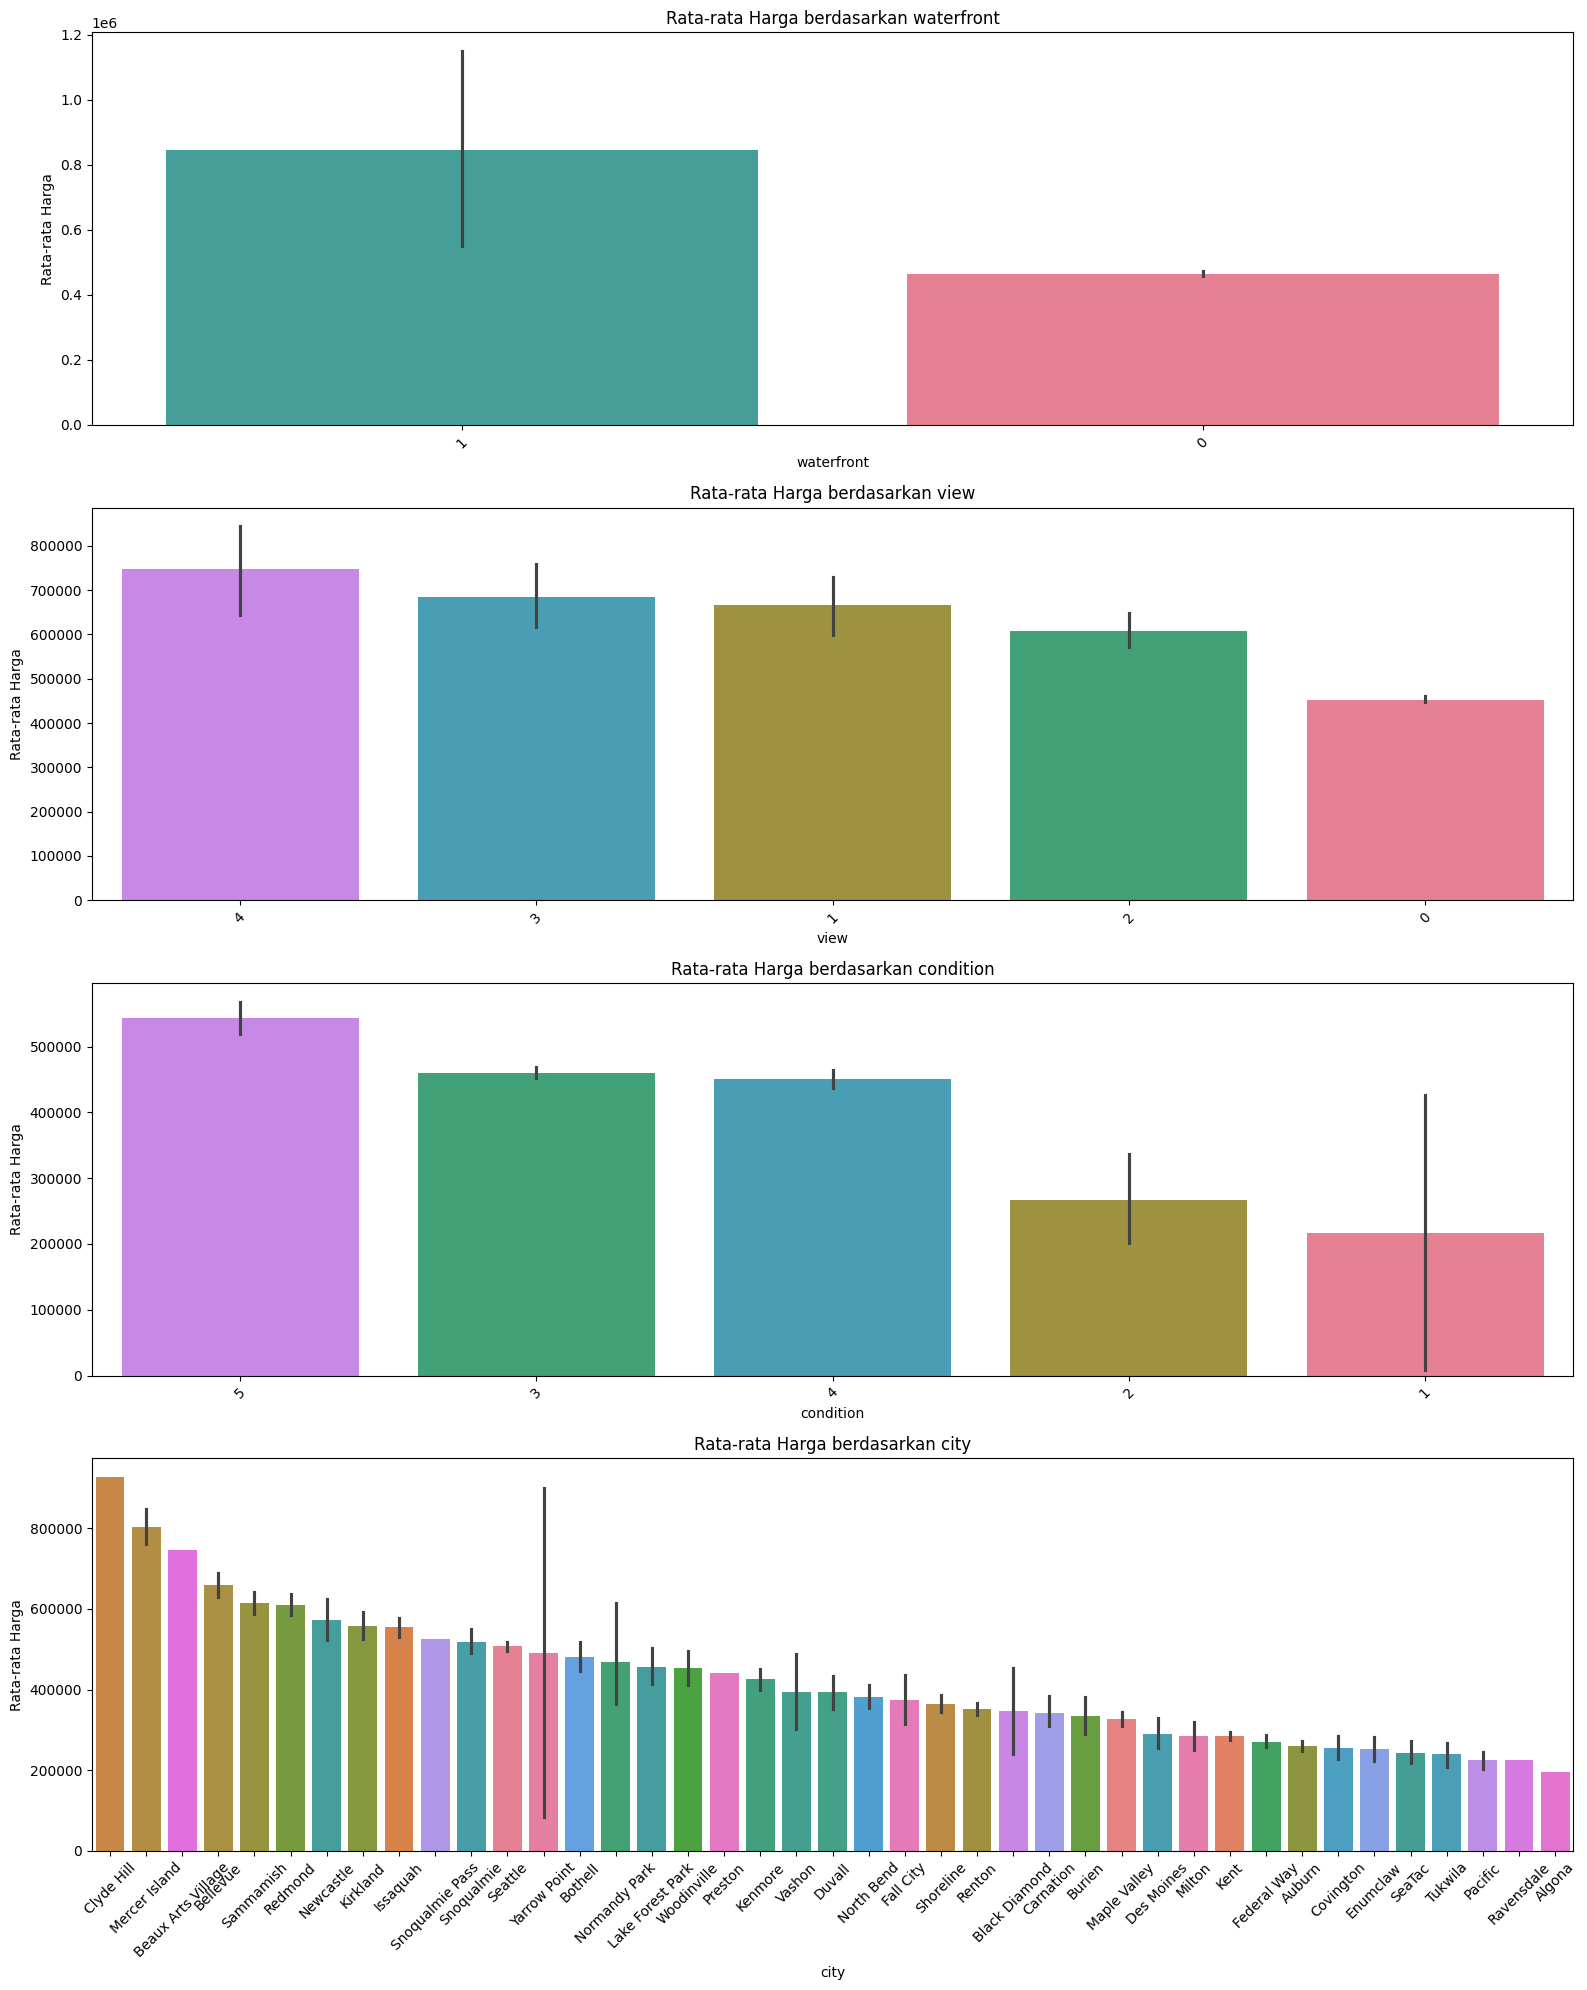

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = ['waterfront', 'view', 'condition', 'city']

plt.figure(figsize=(16, 20))
for i, feature in enumerate(categorical_features):
    plt.subplot(len(categorical_features), 1, i+1)

    # Mengurutkan berdasarkan rata-rata harga
    order = df_clean.groupby(feature)['price'].mean().sort_values(ascending=False).index

    # Buat palet warna berbeda
    palette = sns.color_palette("husl", len(order))

    sns.barplot(
        data=df_clean,
        x=feature,
        y='price',
        order=order,
        palette=palette,
        hue=feature,
        legend=False  # agar tidak muncul legend berulang
    )
    plt.xticks(rotation=45)
    plt.title(f'Rata-rata Harga berdasarkan {feature}')
    plt.ylabel('Rata-rata Harga')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


Insight :
1. Waterfront
Kepemilikan tepi pantai adalah faktor yang sangat kuat dalam menentukan harga rumah dalam dataset ini. Meskipun jumlah rumah dengan tepi pantai sedikit, dampaknya terhadap harga sangat besar.

2. Condition
Kualitas pemandangan berkorelasi positif dengan harga rumah. Semakin baik pemandangannya, cenderung semakin tinggi harganya.

3. City
Lokasi geografis (kota) adalah faktor yang sangat penting dalam menentukan harga rumah. Ada perbedaan harga yang signifikan antar kota, yang kemungkinan dipengaruhi oleh faktor-faktor seperti permintaan pasar, fasilitas, aksesibilitas, dan reputasi wilayah. Grafik batang menunjukkan perbedaan rata-rata harga yang signifikan antar kota. Medina dan Hunts Point memiliki rata-rata harga rumah yang jauh lebih tinggi dibandingkan kota-kota lainnya.

4. View
Kualitas pemandangan berkorelasi positif dengan harga rumah. Semakin baik pemandangannya, cenderung semakin tinggi harganya.

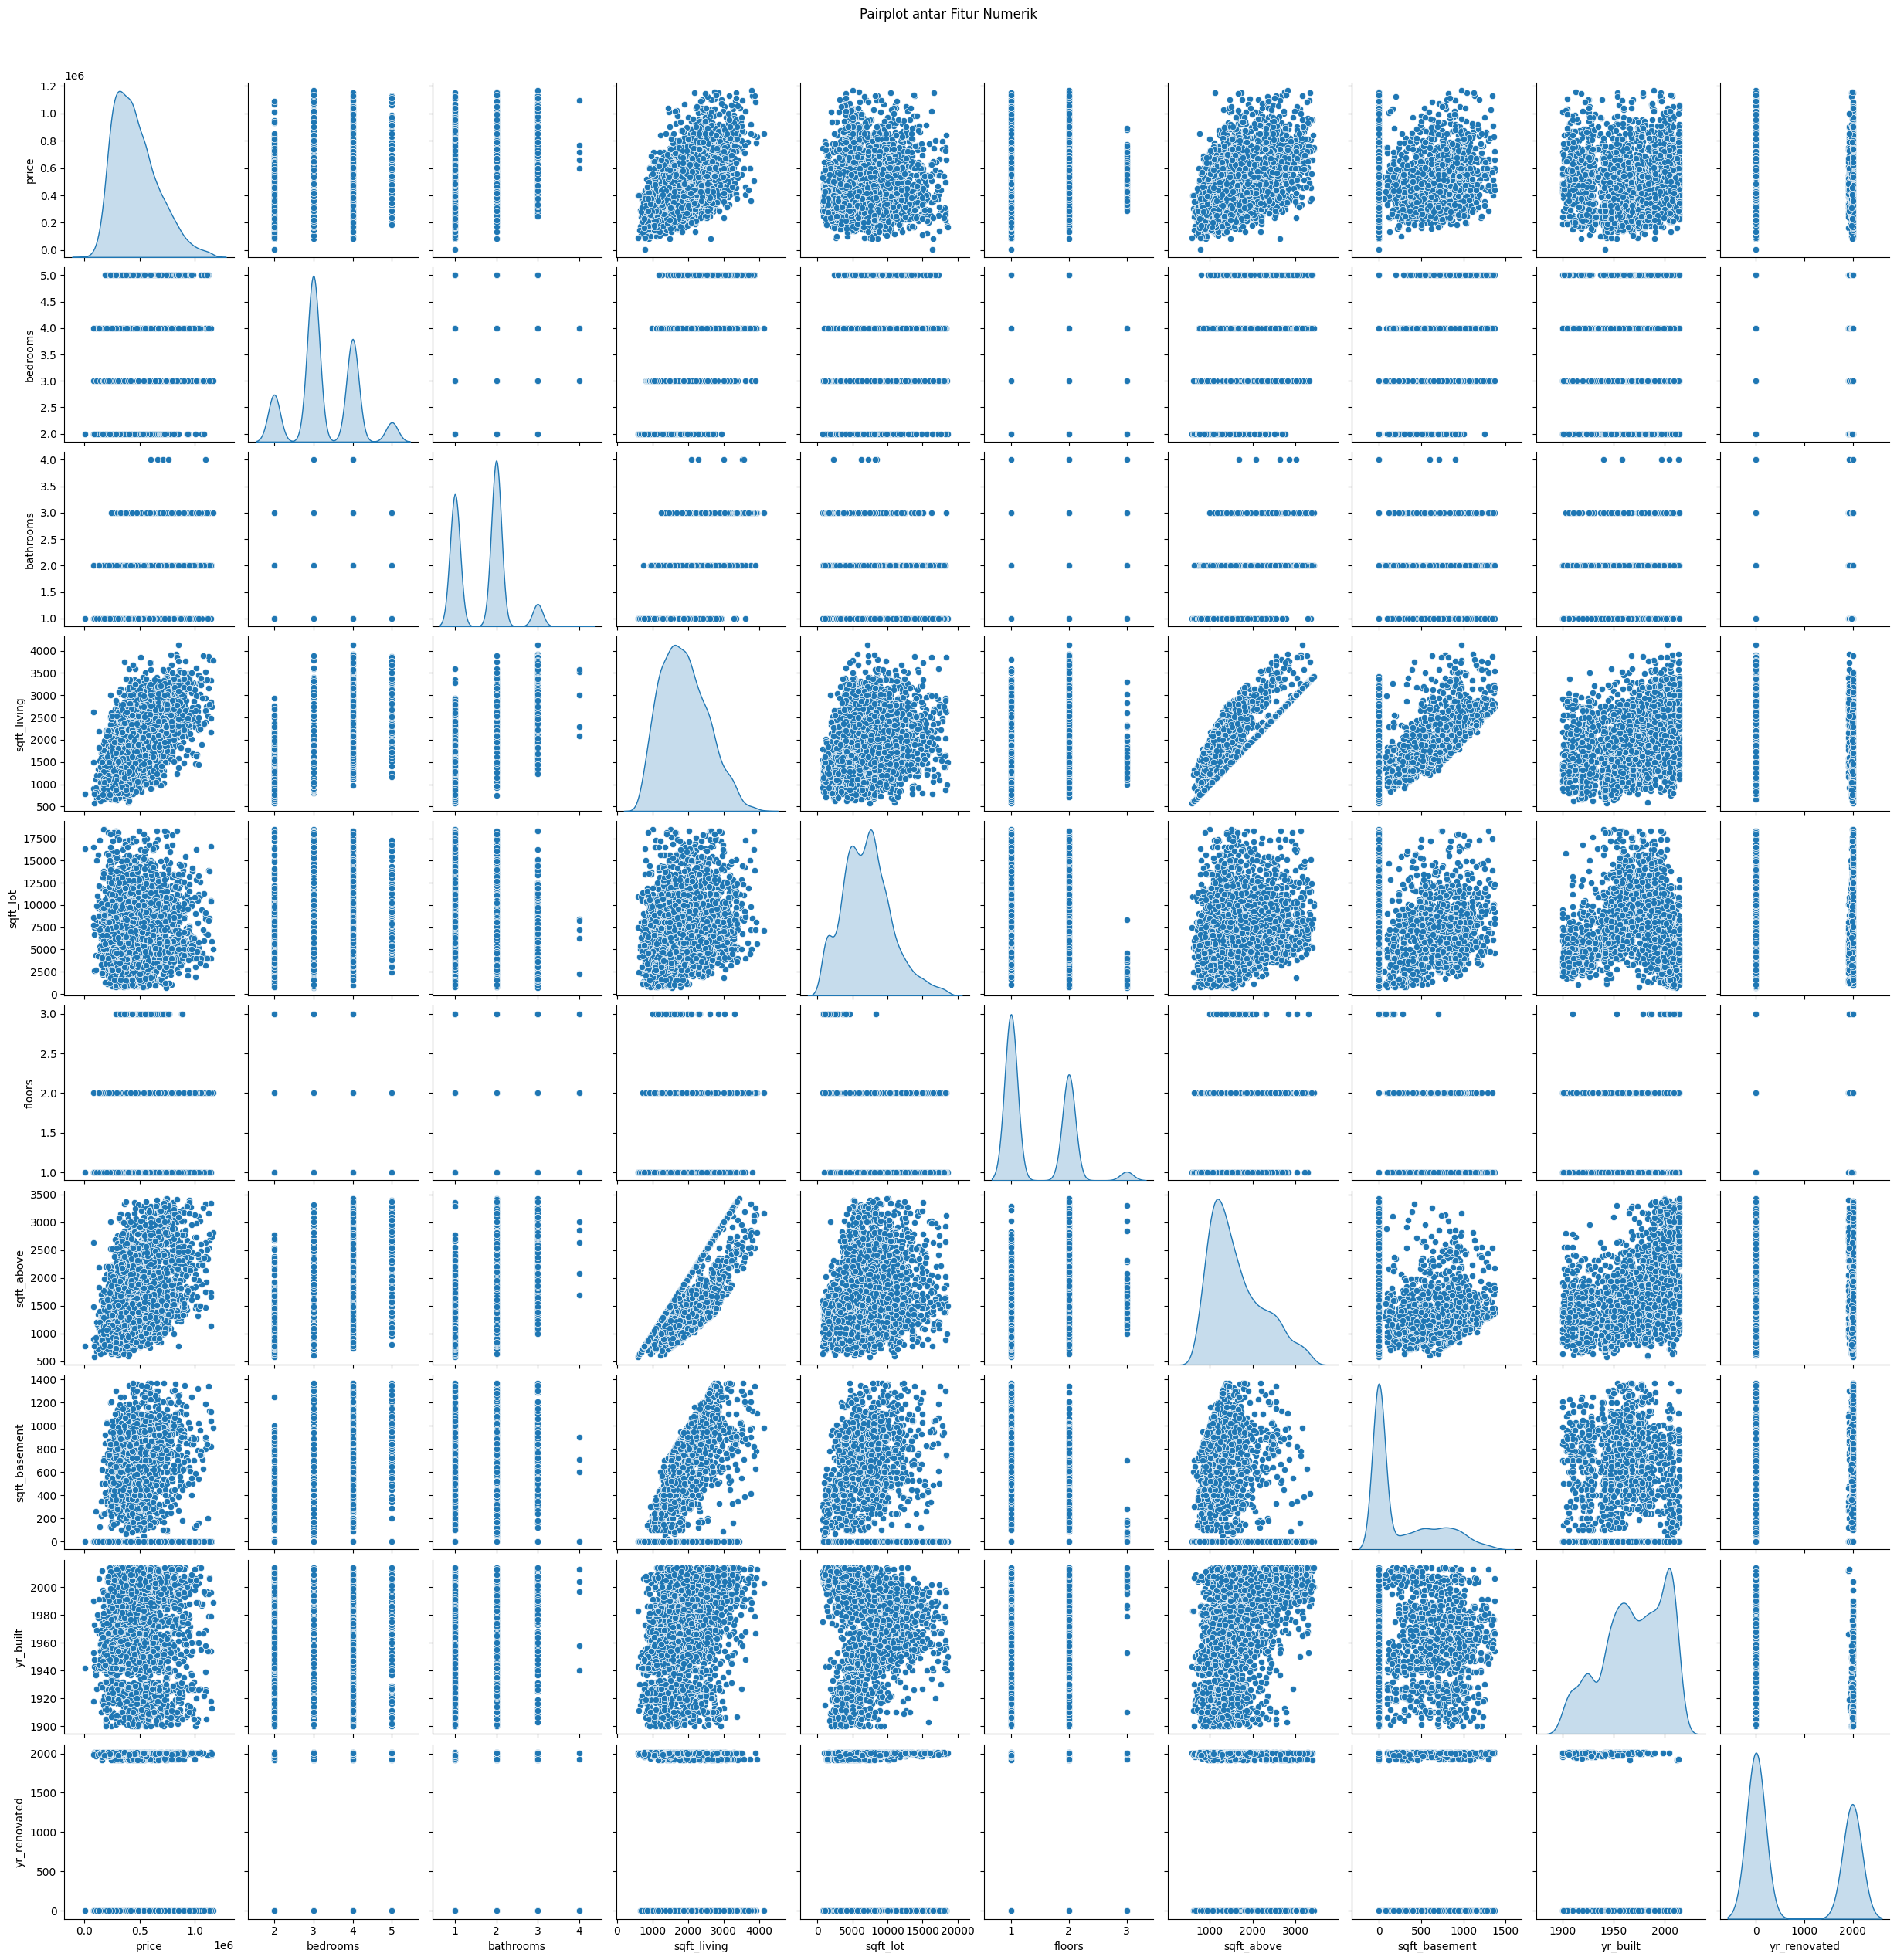

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot pairplot antar fitur numerik
sns.pairplot(df_clean[numerical_features], diag_kind='kde')
plt.suptitle("Pairplot antar Fitur Numerik", y=1.02)
plt.show()

insight:
* Harga rumah tampaknya sangat dipengaruhi oleh ukuran rumah (sqft_living, sqft_above), jumlah kamar mandi dan tidur, serta kualitas konstruksi (grade).
* Luas tanah (sqft_lot) tampaknya tidak menjadi faktor penentu utama harga.
Variabel seperti tepi laut (waterfront) dan pemandangan (view) kemungkinan besar berkorelasi positif dengan harga, meskipun jumlah datanya mungkin sedikit.
* Tahun dibangun (yr_built) mungkin memiliki pengaruh, tetapi hubungannya mungkin tidak linear dan perlu diselidiki lebih lanjut.
Lokasi kota kemungkinan memainkan peran dalam penentuan harga.

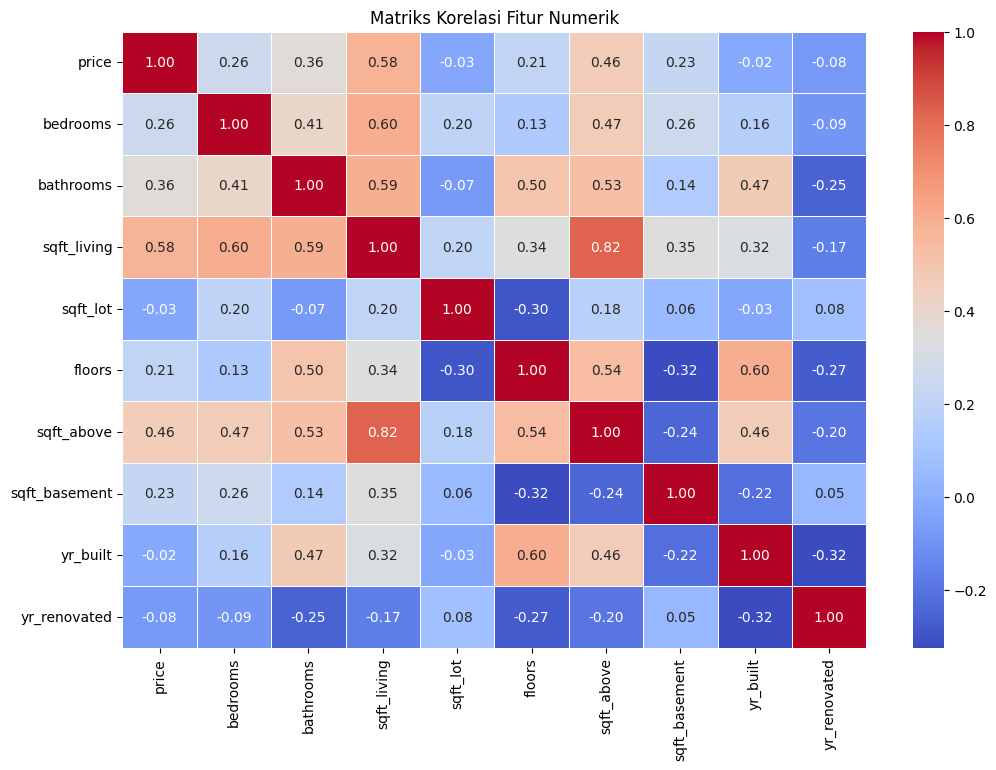

In [78]:
# Membuat correlation matrix dan visualisasinya
plt.figure(figsize=(12, 8))
correlation_matrix = df_clean[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Fitur Numerik")
plt.show()

Matriks korelasi ini menguatkan beberapa observasi awal dari pairplot mengenai hubungan linear antar variabel. Harga rumah memiliki korelasi positif yang signifikan dengan ukuran dan kualitas bangunan (sqft_living, sqft_above), serta jumlah fasilitas (bathrooms). Korelasi dengan luas tanah dan tahun dibangun relatif lemah. Adanya korelasi yang lemah tidak berarti tidak ada hubungan sama sekali, mungkin hubungannya non-linear atau melibatkan interaksi dengan variabel kategorikal seperti waterfront, view, condition, dan city

# Data Preparation

In [79]:
df_clean

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,2014-05-09,376000.000000,3,2,1340,1384,3,0,0,3,1340,0,2008,0,Seattle,WA 98103
3,2014-05-09,324000.000000,3,2,998,904,2,0,0,3,798,200,2007,0,Seattle,WA 98117
5,2014-05-10,320000.000000,3,2,2130,6969,2,0,0,3,2130,0,2003,0,Maple Valley,WA 98038
6,2014-05-10,875000.000000,4,2,2520,6000,1,0,0,3,1400,1120,1921,2007,Seattle,WA 98103
7,2014-05-10,265000.000000,4,1,1940,9533,1,0,0,3,1080,860,1962,2003,Kent,WA 98031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,2014-07-09,308166.666667,3,1,1510,6360,1,0,0,4,1510,0,1954,1979,Seattle,WA 98133
4136,2014-07-09,534333.333333,3,2,1460,7573,2,0,0,3,1460,0,1983,2009,Bellevue,WA 98007
4137,2014-07-09,416904.166667,3,2,3010,7014,2,0,0,3,3010,0,2009,0,Renton,WA 98059
4138,2014-07-10,203400.000000,4,2,2090,6630,1,0,0,3,1070,1020,1974,0,Seattle,WA 98178


In [80]:
df_clean['date'].dt.year.max()

2014

In [81]:
# Fitur numerik terpilih berdasarkan korelasi terhadap 'price'
selected_numerical = [
    'sqft_living', 'bathrooms', 'yr_built', 'yr_renovated', 'sqft_lot',
    'bedrooms', 'floors', 'sqft_basement'
]

# Fitur kategorikal terpilih
selected_categorical = ['condition', 'view', 'waterfront', 'city']

# Salin subset data dari df_clean
df_model = df_clean[selected_numerical + selected_categorical + ['price']].copy()

# Buat fitur interaksi
df_model['view_sqft'] = df_model['view'] * df_model['sqft_living']
df_model['waterfront_sqft'] = df_model['waterfront'] * df_model['sqft_living']
df_model['status_renovation'] = df_model['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

reference_year = 2014

df_model['age'] = reference_year - df_model['yr_built']
df_model['years_since_renovated'] = df_model['yr_renovated'].apply(
    lambda x: reference_year - x if x > 0 else 0
)

# Tampilkan data awal
df_model.head()

,sqft_living,bathrooms,yr_built,yr_renovated,sqft_lot,bedrooms,floors,sqft_basement,condition,view,waterfront,city,price,view_sqft,waterfront_sqft,status_renovation,age,years_since_renovated
0,1340,2,2008,0,1384,3,3,0,3,0,0,Seattle,376000.0,0,0,0,6,0
3,998,2,2007,0,904,3,2,200,3,0,0,Seattle,324000.0,0,0,0,7,0
5,2130,2,2003,0,6969,3,2,0,3,0,0,Maple Valley,320000.0,0,0,0,11,0
6,2520,2,1921,2007,6000,4,1,1120,3,0,0,Seattle,875000.0,0,0,1,93,7
7,1940,1,1962,2003,9533,4,1,860,3,0,0,Kent,265000.0,0,0,1,52,11


Insight :
* Dibuat fitur baru berupa `view_sqft` dan `waterfront_sqft`, yang merupakan hasil perkalian antara fitur view dan sqft_living, serta waterfront dan sqft_living. fitur ini dibuat Untuk menangkap efek interaktif antara lokasi/akses pemandangan dan ukuran rumah terhadap harga. Fitur ini seringkali memiliki pengaruh non-linear terhadap harga.
* Dibuat fitur `status_renovation` yang menyatakan apakah rumah pernah direnovasi (1) atau tidak (0), berdasarkan nilai `yr_renovated`. Informasi binary ini lebih mudah dipahami oleh model dan seringkali cukup untuk menunjukkan nilai tambah dari renovasi.
* Fitur `age` dihitung dari selisih antara `reference_year` (2014) dan `yr_built`. Dikarenakan data ini transaksi terakhir pada tahun 2014, maka digunakanlah tahun tersebut untuk menghitung kurun waktu rumah. Fitur years_since_renovated dihitung dari reference_year dikurangi yr_renovated jika pernah direnovasi, atau 0 jika tidak. Umur properti dan waktu sejak renovasi terakhir seringkali berpengaruh terhadap kondisi dan nilai jual rumah.

In [82]:
top_15_cities = df_model['city'].value_counts().nlargest(15).index

df_model['city_reduced'] = df_model['city'].apply(lambda x: x if x in top_15_cities else 'Other')
city_dummies = pd.get_dummies(df_model['city_reduced'], prefix='city', drop_first=True)

df_model = pd.concat([df_model.drop(columns=['city', 'city_reduced']), city_dummies], axis=1)

In [83]:
city_cols = [col for col in df_model.columns if col.startswith('city_')]
df_model[city_cols] = df_model[city_cols].astype(int)

Insight :    
proses konversi kolom city ini bertujuan mengefisienkan jumlah fitur kategori kota dengan hanya fokus ke 15 kota terbanyak. Karena pada dataset ini jenis value city sangat banyak. jadi untuk menghindari model mengalami  overfitting, maka di ambilkah 15 terbanyak.

In [84]:
# Hitung jumlah nilai 0 pada kolom 'sqft_basement'
jumlah_nol = (df_model['sqft_basement'] == 0).sum()

# Hitung total data
total_data = len(df_model)

# Hitung persentase
persentase_nol = (jumlah_nol / total_data) * 100

# Tampilkan hasil
print(f"Jumlah nilai 0 pada 'sqft_basement': {jumlah_nol}")
print(f"Persentase nilai 0: {persentase_nol:.2f}% dari total {total_data} data")

Jumlah nilai 0 pada 'sqft_basement': 1960
Persentase nilai 0: 61.10% dari total 3208 data


In [85]:
df_model = df_model.copy()
df_model['has_basement'] = df_model['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

Insight :    
Dibuat fitur baru has_basement yang bernilai 1 jika sqft_basement > 0, dan 0 jika tidak. Kemudian fitur asli sqft_basement dihapus dari data. Karena distribusi data sqft_basement sangat tidak merata (dominan nol), mempertahankannya sebagai variabel numerik dapat menyebabkan skala nilai menjadi tidak seimbang. Oleh karena itu, fitur ini diubah menjadi biner untuk menunjukkan hanya keberadaan basement tanpa mempertimbangkan ukurannya. Ini membuat fitur lebih informatif dan menghindari bias terhadap rumah dengan basement sangat besar.

In [86]:
df_model

,sqft_living,bathrooms,yr_built,yr_renovated,sqft_lot,bedrooms,floors,sqft_basement,condition,view,...,city_Kent,city_Kirkland,city_Maple Valley,city_Other,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Shoreline,has_basement
0,1340,2,2008,0,1384,3,3,0,3,0,...,0,0,0,0,0,0,0,1,0,0
3,998,2,2007,0,904,3,2,200,3,0,...,0,0,0,0,0,0,0,1,0,1
5,2130,2,2003,0,6969,3,2,0,3,0,...,0,0,1,0,0,0,0,0,0,0
6,2520,2,1921,2007,6000,4,1,1120,3,0,...,0,0,0,0,0,0,0,1,0,1
7,1940,1,1962,2003,9533,4,1,860,3,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,1510,1,1954,1979,6360,3,1,0,4,0,...,0,0,0,0,0,0,0,1,0,0
4136,1460,2,1983,2009,7573,3,2,0,3,0,...,0,0,0,0,0,0,0,0,0,0
4137,3010,2,2009,0,7014,3,2,0,3,0,...,0,0,0,0,0,1,0,0,0,0
4138,2090,2,1974,0,6630,4,1,1020,3,0,...,0,0,0,0,0,0,0,1,0,1


In [87]:
df_model = df_model.drop(columns=['sqft_basement'])

Hapus kolom `sqft_basement` agar karena kita sekarang menggunakan kolom pengganti yaitu `has_basement`

In [88]:
df_model.head(15)

,sqft_living,bathrooms,yr_built,yr_renovated,sqft_lot,bedrooms,floors,condition,view,waterfront,...,city_Kent,city_Kirkland,city_Maple Valley,city_Other,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Shoreline,has_basement
0,1340,2,2008,0,1384,3,3,3,0,0,...,0,0,0,0,0,0,0,1,0,0
3,998,2,2007,0,904,3,2,3,0,0,...,0,0,0,0,0,0,0,1,0,1
5,2130,2,2003,0,6969,3,2,3,0,0,...,0,0,1,0,0,0,0,0,0,0
6,2520,2,1921,2007,6000,4,1,3,0,0,...,0,0,0,0,0,0,0,1,0,1
7,1940,1,1962,2003,9533,4,1,3,0,0,...,1,0,0,0,0,0,0,0,0,1
8,1350,2,2006,0,1250,3,3,3,0,0,...,0,0,0,0,0,0,0,1,0,1
9,2160,2,1902,0,5298,4,2,4,0,0,...,0,0,0,0,0,0,0,1,0,0
10,1370,2,2007,0,1350,3,2,3,0,0,...,0,0,0,0,0,0,0,1,0,1
12,2830,2,1995,0,5000,4,2,3,0,0,...,0,0,0,0,0,0,0,1,0,0
13,2010,2,2014,0,2287,3,2,3,0,0,...,0,0,0,0,0,0,0,0,0,1


# Train-Test-Split

In [89]:
X = df_model.drop(columns=['price'])
y = df_model['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2566, 31)
X_test shape: (642, 31)
y_train shape: (2566,)
y_test shape: (642,)


In [90]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 3208
Total # of sample in train dataset: 2566
Total # of sample in test dataset: 642


# Standarisasi

Standardisasi adalah teknik transformasi yang paling umum digunakan dalam tahap persiapan pemodelan. Untuk fitur numerik, kita tidak akan melakukan transformasi dengan one-hot-encoding seperti pada fitur kategori. Dataset yang di standarisasi ini digunakan untuk model regresi linear dan KNN



In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Salin versi asli
X_train_original = X_train.copy()
X_test_original = X_test.copy()

# Kolom numerik untuk standarisasi
numerical_cols = [
    'sqft_living', 'bathrooms', 'yr_built', 'yr_renovated',
    'sqft_lot', 'bedrooms', 'floors'
]

# Standarisasi
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

Versi data terstandarisasi disimpan di `X_train_scaled`dan `X_test_scaled`, dan akan digunakan khusus untuk model yang membutuhkan normalisasi skala fitur (seperti KNN dan Linear Regression).

Sementara itu, versi data asli tanpa standarisasi tetap digunakan untuk model yang tidak sensitif terhadap skala, seperti Decision Tree dan Random Forest.

# Model Development
Ketiga algoritma yang akan kita gunakan, antara lain:
1. K-Nearest Neighbor
2. Random Forest
3. Boosting Algorithm
4. Linear regression

In [92]:
# Inisialisasi penyimpanan hasil
final_results = []

In [93]:
# 1. Linear Regression (TANPA TUNING)
print("Evaluasi Linear Regression...")
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Prediksi untuk data train dan test (keduanya harus terstandarisasi)
y_pred_lr_train = lr.predict(X_train_scaled)
y_pred_lr_test = lr.predict(X_test_scaled)

# Simpan hasil evaluasi
final_results.append({
    'Model': 'Linear Regression',
    'Best Params': 'None',
    'Train MSE': mean_squared_error(y_train, y_pred_lr_train),
    'Test MSE': mean_squared_error(y_test, y_pred_lr_test),
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_pred_lr_train)),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lr_test)),
    'Train R2': r2_score(y_train, y_pred_lr_train),
    'Test R2': r2_score(y_test, y_pred_lr_test)
})


Evaluasi Linear Regression...


In [94]:
# 2. KNN Regression (DENGAN TUNING)
print("\nTuning KNN Regressor...")

knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn_grid = GridSearchCV(
    KNeighborsRegressor(),
    knn_params,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Gunakan data terstandarisasi
knn_grid.fit(X_train_scaled, y_train)

# Prediksi dengan data train dan test (keduanya harus terstandarisasi)
y_pred_knn_train = knn_grid.best_estimator_.predict(X_train_scaled)
y_pred_knn_test = knn_grid.best_estimator_.predict(X_test_scaled)

# Simpan hasil evaluasi
final_results.append({
    'Model': 'KNN',
    'Best Params': knn_grid.best_params_,
    'Train MSE': mean_squared_error(y_train, y_pred_knn_train),
    'Test MSE': mean_squared_error(y_test, y_pred_knn_test),
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_pred_knn_train)),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred_knn_test)),
    'Train R2': r2_score(y_train, y_pred_knn_train),
    'Test R2': r2_score(y_test, y_pred_knn_test)
})



Tuning KNN Regressor...


In [95]:
# 3. Random Forest (DENGAN TUNING)
print("\nTuning Random Forest...")
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42),
                      rf_params,
                      cv=5,
                      scoring='neg_mean_squared_error',
                      n_jobs=-1)
rf_grid.fit(X_train, y_train)

y_pred_rf_train = rf_grid.best_estimator_.predict(X_train)
y_pred_rf_test = rf_grid.best_estimator_.predict(X_test)

final_results.append({
    'Model': 'Random Forest',
    'Best Params': rf_grid.best_params_,
    'Train MSE': mean_squared_error(y_train, y_pred_rf_train),
    'Test MSE': mean_squared_error(y_test, y_pred_rf_test),
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_pred_rf_train)),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf_test)),
    'Train R2': r2_score(y_train, y_pred_rf_train),
    'Test R2': r2_score(y_test, y_pred_rf_test)
})


Tuning Random Forest...


In [96]:
# 4. Gradient Boosting (DENGAN TUNING)
print("\nTuning Gradient Boosting...")
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42),
                      gb_params,
                      cv=5,
                      scoring='neg_mean_squared_error',
                      n_jobs=-1)
gb_grid.fit(X_train, y_train)

y_pred_gb_train = gb_grid.best_estimator_.predict(X_train)
y_pred_gb_test = gb_grid.best_estimator_.predict(X_test)

final_results.append({
    'Model': 'Gradient Boosting',
    'Best Params': gb_grid.best_params_,
    'Train MSE': mean_squared_error(y_train, y_pred_gb_train),
    'Test MSE': mean_squared_error(y_test, y_pred_gb_test),
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_pred_gb_train)),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred_gb_test)),
    'Train R2': r2_score(y_train, y_pred_gb_train),
    'Test R2': r2_score(y_test, y_pred_gb_test)
})




Tuning Gradient Boosting...


# Evaluasi Model
Metrik yang akan kita gunakan pada prediksi ini adalah MSE atau Mean Squared Error yang menghitung jumlah selisih kuadrat rata-rata nilai sebenarnya dengan nilai prediksi.

In [51]:
results_df = pd.DataFrame(final_results)
print("\n=== Hasil Evaluasi Model ===")
print(results_df.to_string(index=False))


=== Hasil Evaluasi Model ===
            Model                                                     Best Params    Train MSE     Test MSE    Train RMSE     Test RMSE  Train R2  Test R2
Linear Regression                                                            None 1.388029e+10 1.610842e+10 117814.622611 126918.942100  0.655029 0.604470
              KNN              {'n_neighbors': 11, 'p': 1, 'weights': 'distance'} 0.000000e+00 2.351729e+10      0.000000 153353.488082  1.000000 0.422550
    Random Forest {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 200} 5.143123e+09 1.480457e+10  71715.568765 121674.037170  0.872176 0.636485
Gradient Boosting     {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200} 1.009787e+10 1.443807e+10 100488.150783 120158.511379  0.749034 0.645484


In [52]:
import matplotlib.pyplot as plt
import numpy as np

models = results_df['Model']
train_rmse = results_df['Train RMSE']
test_rmse = results_df['Test RMSE']
train_mse = results_df['Train MSE']
test_mse = results_df['Test MSE']
train_r2 = results_df['Train R2']
test_r2 = results_df['Test R2']

x = np.arange(len(models))
width = 0.35

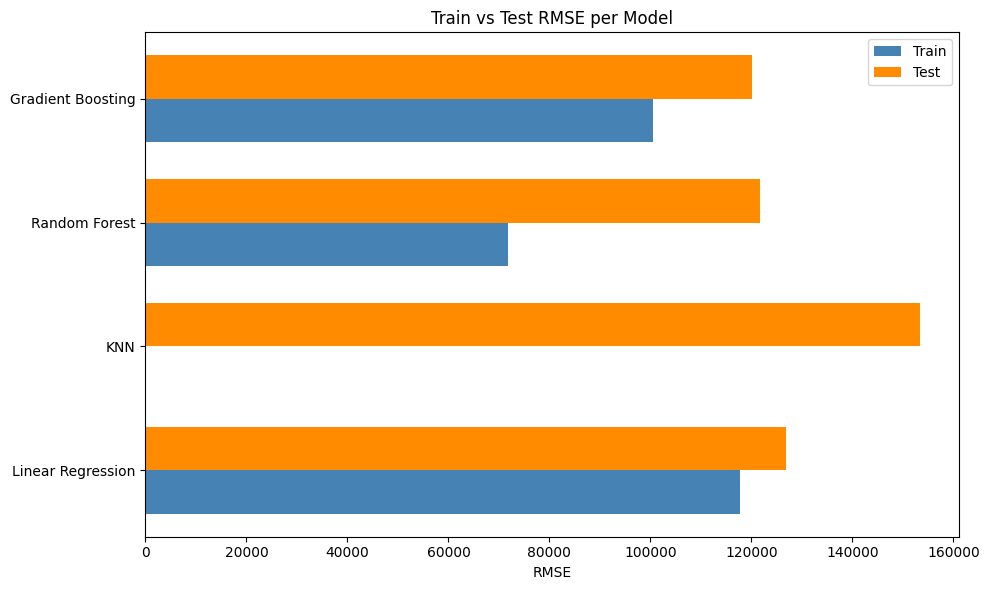

In [53]:
# --- 1. RMSE ---
plt.figure(figsize=(10, 6))
plt.barh(x - width/2, train_rmse, height=width, label='Train', color='steelblue')
plt.barh(x + width/2, test_rmse, height=width, label='Test', color='darkorange')
plt.yticks(x, models)
plt.xlabel('RMSE')
plt.title('Train vs Test RMSE per Model')
plt.legend()
plt.tight_layout()
plt.show()

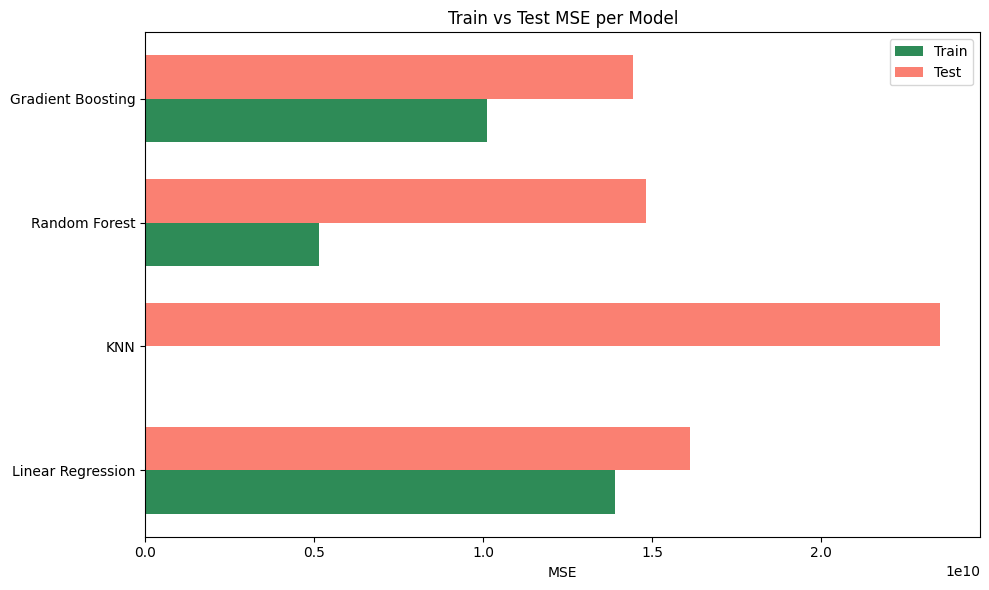

In [54]:
# --- 2. MSE ---
plt.figure(figsize=(10, 6))
plt.barh(x - width/2, train_mse, height=width, label='Train', color='seagreen')
plt.barh(x + width/2, test_mse, height=width, label='Test', color='salmon')
plt.yticks(x, models)
plt.xlabel('MSE')
plt.title('Train vs Test MSE per Model')
plt.legend()
plt.tight_layout()
plt.show()

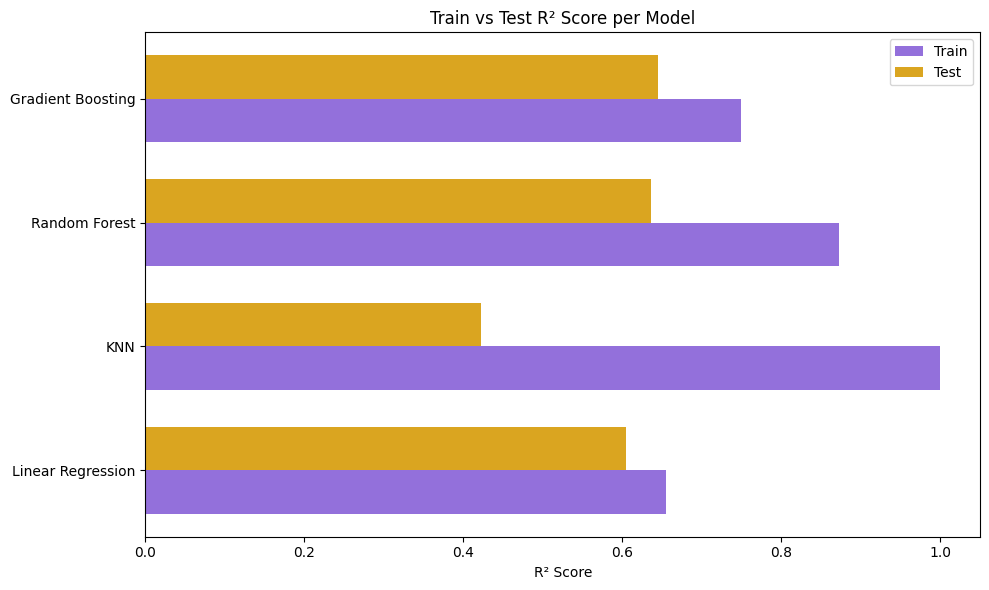

In [55]:
# --- 3. R² Score ---
plt.figure(figsize=(10, 6))
plt.barh(x - width/2, train_r2, height=width, label='Train', color='mediumpurple')
plt.barh(x + width/2, test_r2, height=width, label='Test', color='goldenrod')
plt.yticks(x, models)
plt.xlabel('R² Score')
plt.title('Train vs Test R² Score per Model')
plt.legend()
plt.tight_layout()
plt.show()

## Interpretasi Hasil
1. Linear Regression

Train RMSE dan Test RMSE cukup dekat (≈117k vs 126k), menunjukkan model ini tidak overfitting. Namun, R² hanya sekitar 0.60, artinya hanya 60% variasi target yang bisa dijelaskan. Model baseline, tidak kompleks, tapi performanya terbatas.

2. K-Nearest Neighbors (KNN)

Train RMSE = 0 dan R² = 1: indikasi overfitting ekstrim. Namun, Test RMSE tinggi (153k) dan Test R² hanya 0.42. Kesimpulannya model gagal generalisasi ke data baru.

3. Random Forest

Train RMSE = 71k, cukup rendah tetapi model belajar cukup baik. Test RMSE = 121k, ada sedikit overfitting, tapi masih bisa diterima. R² Train = 0.87, Test = 0.63 → model cukup kuat dalam menangkap hubungan antar fitur.

4. Gradient Boosting

Train RMSE = 100k, lebih besar dari Random Forest. Test RMSE paling rendah (120k) dan R² Test tertinggi (0.645). Artinya model ini menghindari overfitting, dan paling bagus di generalisasi ke data baru. Cenderung lebih halus dan presisi, cocok untuk dataset dengan noise.

## Kesimpulan
Berdasarkan hasil evaluasi terhadap empat algoritma regresi, yaitu Linear Regression, K-Nearest Neighbors (KNN), Random Forest, dan Gradient Boosting, model yang direkomendasikan sebagai solusi terbaik adalah Gradient Boosting. Model ini menunjukkan performa paling seimbang dengan nilai R² tertinggi pada data uji sebesar 0.645, serta nilai MSE dan RMSE yang relatif rendah, menandakan kemampuan prediksi yang baik dan generalisasi yang kuat. Berbeda dengan KNN yang mengalami overfitting (R² training = 1.0, R² testing = 0.42), Gradient Boosting tetap stabil tanpa kehilangan akurasi pada data uji. Model ini juga telah ditingkatkan melalui proses hyperparameter tuning menggunakan GridSearchCV dengan kombinasi parameter terbaik n_estimators=200, max_depth=3, dan learning_rate=0.1, yang memberikan kontribusi terhadap peningkatan performa model. Dengan mempertimbangkan hasil evaluasi kuantitatif serta proses tuning yang dilakukan, Gradient Boosting dipilih sebagai model yang paling layak digunakan untuk menyelesaikan permasalahan prediksi harga dalam proyek ini.